In [1]:
import warnings
warnings.filterwarnings("ignore")
import MS
import scanpy as sc


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.2 statsmodels==0.13.5 python-igraph==0.10.2 pynndescent==0.5.8


### load the dataset

In [2]:
import pysodb
sodb = pysodb.SODB()
adata_dict = sodb.load_dataset('Dataset15_MS_raw')
adata = list(adata_dict.values())[0]

download experiment[Dataset15] in dataset[Dataset15_MS_raw]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29.3M/29.3M [00:01<00:00, 18.5MB/s]


load experiment[Dataset15] in dataset[Dataset15_MS_raw] from /home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/pysodb-1.0.0-py3.9.egg/es/pysodb/cache/Dataset15_MS_raw/Dataset15.h5ad


In [3]:
adata

AnnData object with n_obs × n_vars = 32845 × 28
    obs: 'x', 'y', 'z', 'n_counts', 'leiden'
    uns: 'leiden', 'leiden_colors', 'moranI', 'neighbors', 'spatial_neighbors', 'umap'
    obsm: 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

## cell type clustering

In [25]:
adata.var_names_make_unique()

adata.layers["counts"] = adata.X.copy()
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=4000)
sc.pp.normalize_total(adata)
# sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata,key_added='ct',resolution=1)


## MS

In [26]:
# initialize the MS object
ms = MS.MS(
    adata
)

# set the number of scales, default is 15
ms.set_MS_para(
    n_scales=20
)

# construct the context-aware representation
ms.k_representation_mp()


In [27]:
# identify tissue structure given the number of k
ms.run_clustering_normal(
    -0.5 
    # the clustering parameter
    # positive value for the number of clusters
    # negative value for the clustering resolution
)

## output results

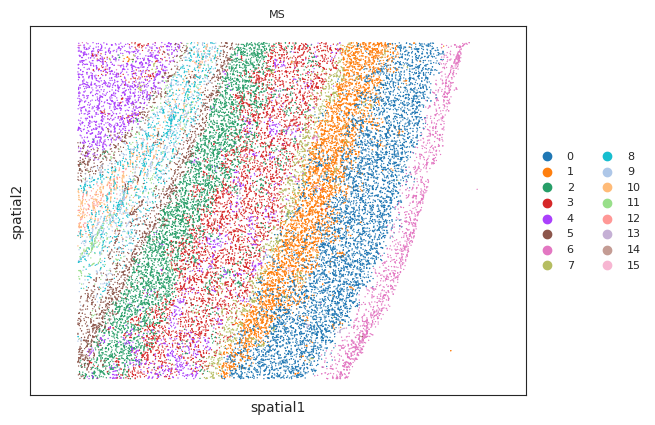

In [28]:
# the result of MS
ms.output_cluster('MS')

## external application: Tissue Visualization via MS-View

In [29]:
ms.run_visualization_normal()

generating color coding...
1.0 0.0


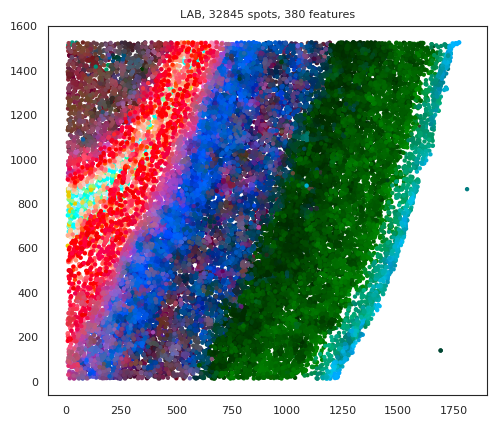

1.0 0.0


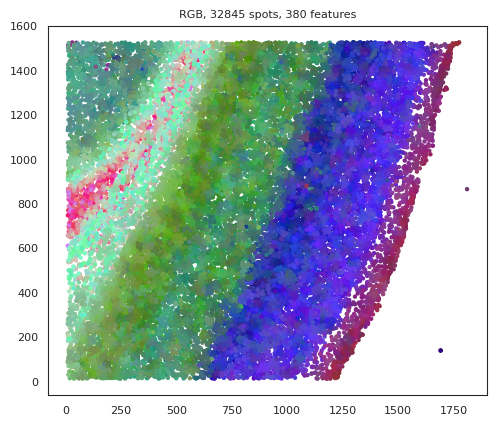

In [30]:
ms.output_visualization_single(
    dot_size=10
    # control the size of cell
)

In [31]:
# save results
ms.adata_MS.write_h5ad(f'process/{data_use}.h5ad')